# Pendahuluan

Tema dari analisis ini adalah keuangan dimana hasilnya akan berupa model machine learning yang nanti dapat digunakan untuk memprediksi harga dari Ethereum sebagai Analisis dan Prediksi Harga Ethereum Menggunakan Algoritma KNN, Random Forest, dan AdaBoost

# Data Loading
## Import Library

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor



# Data Loading (Unggah Data)

In [38]:
# Load dataset Ethereum
df = pd.read_csv('coin_Ethereum.csv')
df.sort_values(by='Date', inplace=True)
df.set_index('Date', inplace=True)
df.head()


,SNo,Name,Symbol,High,Low,Open,Close,Volume,Marketcap
Date,,,,,,,,,
2015-08-08 23:59:59,1,Ethereum,ETH,2.798810,0.714725,2.793760,0.753325,674188.0,4.548689e+07
2015-08-09 23:59:59,2,Ethereum,ETH,0.879810,0.629191,0.706136,0.701897,532170.0,4.239957e+07
2015-08-10 23:59:59,3,Ethereum,ETH,0.729854,0.636546,0.713989,0.708448,405283.0,4.281836e+07
2015-08-11 23:59:59,4,Ethereum,ETH,1.131410,0.663235,0.708087,1.067860,1463100.0,6.456929e+07
2015-08-12 23:59:59,5,Ethereum,ETH,1.289940,0.883608,1.058750,1.217440,2150620.0,7.364501e+07


## Mengunggah data Ethereum
| No | Kolom       | Tipe Data | Penjelasan                                                            |
| -- | ----------- | --------- | --------------------------------------------------------------------- |
| 1  | `SNo`       | `int64`   | Nomor urut data, biasanya hanya sebagai index atau penanda baris      |
| 2  | `Name`      | `object`  | Nama koin kripto, dalam hal ini kemungkinan semua bernilai "Ethereum" |
| 3  | `Symbol`    | `object`  | Simbol dari koin, seperti `ETH`                                       |
| 4  | `High`      | `float64` | Harga tertinggi Ethereum dalam periode (misalnya harian)              |
| 5  | `Low`       | `float64` | Harga terendah Ethereum dalam periode                                 |
| 6  | `Open`      | `float64` | Harga saat pasar dibuka dalam periode itu                             |
| 7  | `Close`     | `float64` | Harga saat pasar ditutup dalam periode itu                            |
| 8  | `Volume`    | `float64` | Total volume perdagangan Ethereum (jumlah transaksi) dalam periode    |
| 9  | `Marketcap` | `float64` | Kapitalisasi pasar Ethereum = harga x total supply                    |



In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2160 entries, 2015-08-08 23:59:59 to 2021-07-06 23:59:59
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2160 non-null   int64  
 1   Name       2160 non-null   object 
 2   Symbol     2160 non-null   object 
 3   High       2160 non-null   float64
 4   Low        2160 non-null   float64
 5   Open       2160 non-null   float64
 6   Close      2160 non-null   float64
 7   Volume     2160 non-null   float64
 8   Marketcap  2160 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 168.8+ KB


In [40]:
# Hapus kolom yang tidak diperlukan
df.drop(['SNo', 'Name', 'Symbol', 'Volume', 'Marketcap'], axis=1, inplace=True)

# Buat fitur rata-rata harga harian
df['OHLC_Average'] = df[['Open', 'High', 'Low', 'Close']].mean(axis=1)

# Buat target prediksi harga 30 hari ke depan
df['Price_After_Month'] = df['Close'].shift(-30)

# Hapus baris dengan nilai kosong
df.dropna(inplace=True)


In [41]:
df.tail()

,High,Low,Open,Close,OHLC_Average,Price_After_Month
Date,,,,,,
2021-06-02 23:59:59,2801.392396,2555.401481,2634.455996,2706.124971,2674.343711,2150.040364
2021-06-03 23:59:59,2891.254971,2667.684221,2708.376141,2855.126531,2780.610466,2226.114282
2021-06-04 23:59:59,2857.165616,2562.637385,2857.165616,2688.194999,2741.290904,2321.724112
2021-06-05 23:59:59,2817.484904,2558.233703,2691.619506,2630.576801,2674.478728,2198.582464
2021-06-06 23:59:59,2743.441092,2616.162395,2629.748703,2715.092661,2676.111213,2324.679449


In [42]:
df.head(20)

,High,Low,Open,Close,OHLC_Average,Price_After_Month
Date,,,,,,
2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325,1.765155,1.246650
2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897,0.729258,1.242430
2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448,0.697209,1.206510
2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860,0.892648,1.165770
2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440,1.112435,0.982978
2015-08-13 23:59:59,1.965070,1.171990,1.222240,1.827670,1.546742,1.038740
2015-08-14 23:59:59,2.261880,1.754750,1.810920,1.827870,1.913855,0.936003
2015-08-15 23:59:59,1.877240,1.570980,1.802890,1.688900,1.735002,0.875622
2015-08-16 23:59:59,1.695240,1.089810,1.684350,1.566030,1.508858,0.944410


In [43]:
df.isnull()

,High,Low,Open,Close,OHLC_Average,Price_After_Month
Date,,,,,,
2015-08-08 23:59:59,False,False,False,False,False,False
2015-08-09 23:59:59,False,False,False,False,False,False
2015-08-10 23:59:59,False,False,False,False,False,False
2015-08-11 23:59:59,False,False,False,False,False,False
2015-08-12 23:59:59,False,False,False,False,False,False
...,...,...,...,...,...,...
2021-06-02 23:59:59,False,False,False,False,False,False
2021-06-03 23:59:59,False,False,False,False,False,False
2021-06-04 23:59:59,False,False,False,False,False,False


In [44]:
df.isnull().sum()

,0
High,0
Low,0
Open,0
Close,0
OHLC_Average,0
Price_After_Month,0


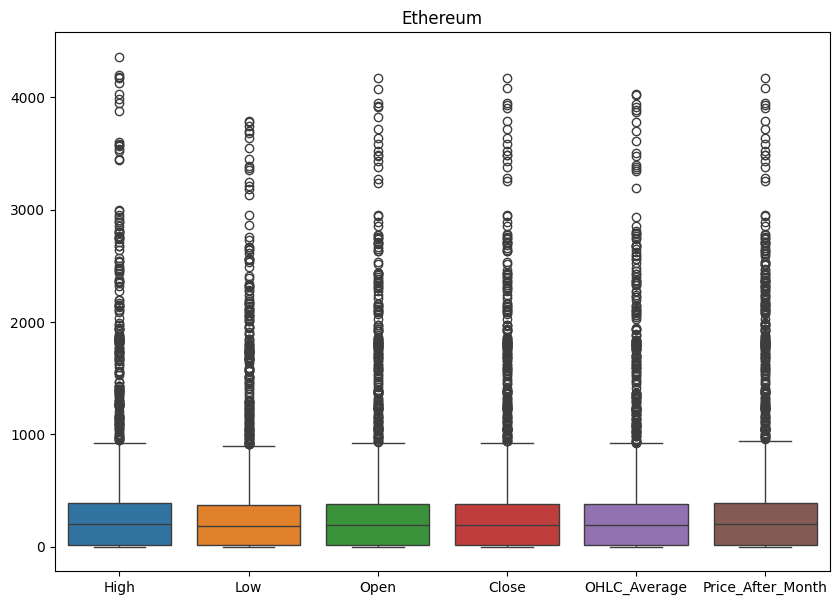

In [45]:
plt.subplots(figsize=(10,7))
sns.boxplot(data=df).set_title("Ethereum")
plt.show()

#Penjelasan Statistik dan Penanganan Outlier
Output statistik memberikan informasi penting terkait sebaran data untuk masing-masing kolom:

*   count: Jumlah total data yang tersedia pada kolom (bukan nilai kosong).

*   mean: Nilai rata-rata dari data pada kolom tersebut.

*   std: Standar deviasi, mengukur seberapa besar penyebaran data terhadap rata-ratanya.

*   min: Nilai terkecil pada kolom.

*   25% (Q1): Kuartil pertama, yaitu nilai di bawah 25% data berada.

*   50% (Median): Kuartil kedua atau nilai tengah dari data.

*   75% (Q3): Kuartil ketiga, yaitu nilai di bawah 75% data berada.

*   max: Nilai maksimum pada kolom.

Berdasarkan nilai Q1 dan Q3, kita dapat menghitung IQR (Interquartile Range) yang digunakan untuk mendeteksi outlier, yaitu nilai-nilai yang berada di luar rentang:

In [46]:
# Deteksi dan hapus outlier menggunakan IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [47]:
# Pisahkan fitur dan target
X = df.drop('Price_After_Month', axis=1)
y = df['Price_After_Month']

# Standarisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


#Membagi data menjadi 80% train dan 20% test

In [48]:
# Bagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.8, random_state=42)

#Analisa Numeric secara Histrogram

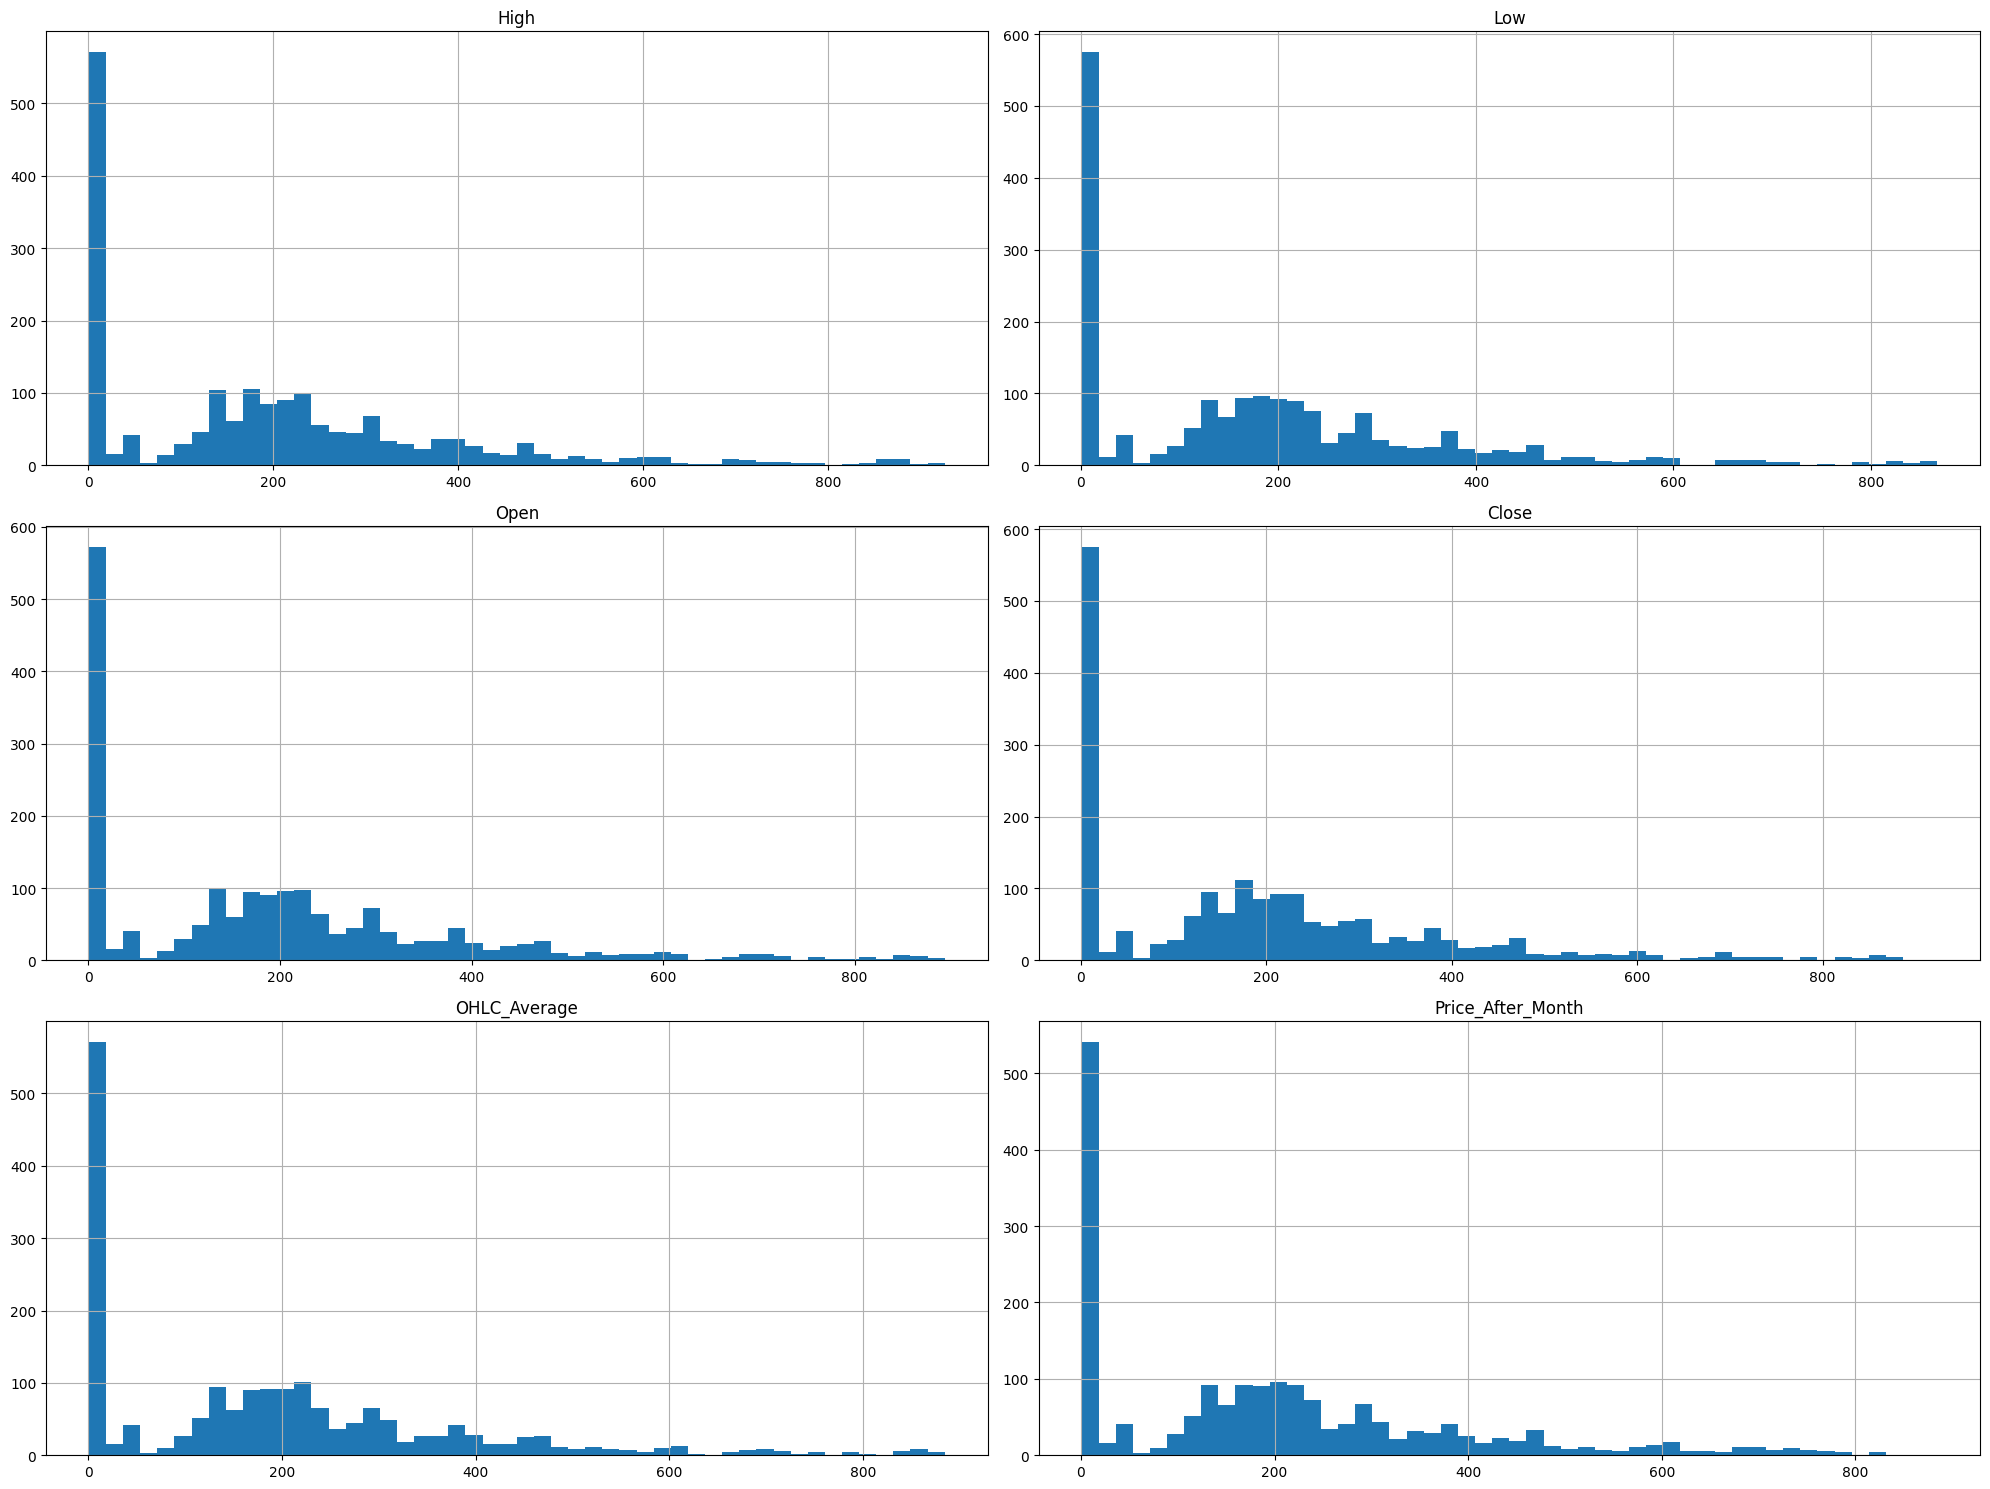

In [49]:
# Visualisasi histogram
df.hist(bins=50, figsize=(20, 15))
plt.tight_layout()
plt.show()



#Korelasi Antar Fitur

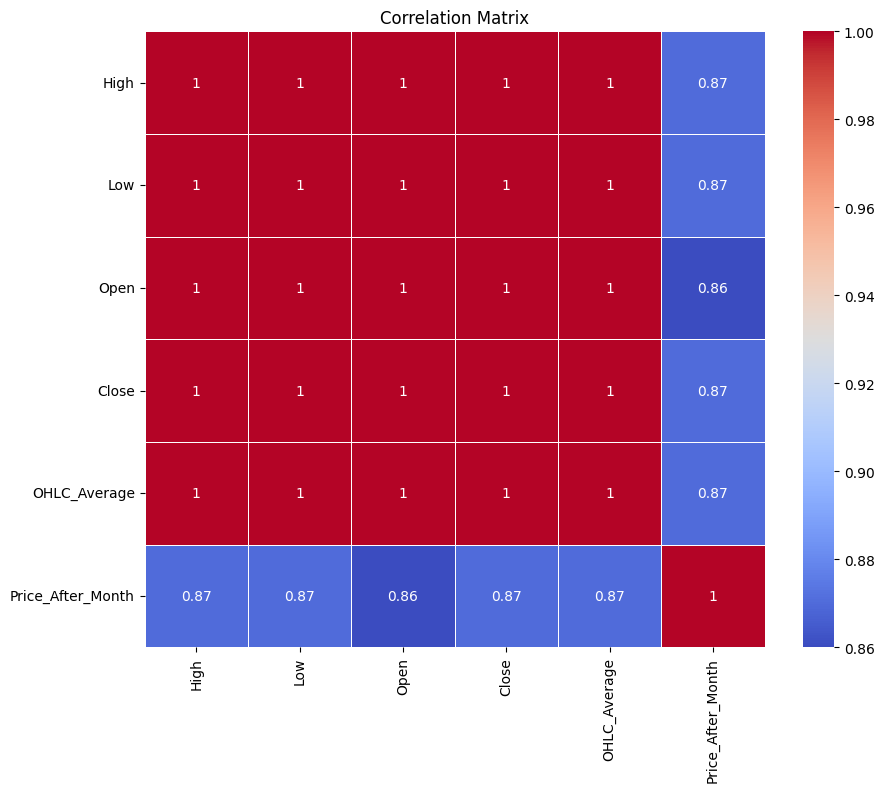

In [50]:
# Korelasi antar fitur
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr().round(2), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

##Modeling

#Pembuatan dan Training Model

Inisialisasi tiga model ML (KNN, Radom Forest, AdaBoost)

In [51]:
# Inisialisasi model
knn = KNeighborsRegressor(n_neighbors=10)
rf = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=42)
boosting = AdaBoostRegressor(n_estimators=50, learning_rate=0.05, random_state=42)

# Latih semua model
knn.fit(X_train, y_train)
rf.fit(X_train, y_train)
boosting.fit(X_train, y_train)

# Evaluasi performa
models = {'KNN': knn, 'Random Forest': rf, 'AdaBoost': boosting}
for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - MSE: {mse:.2f}, R² Score: {r2:.4f}")


KNN - MSE: 6100.06, R² Score: 0.8259
Random Forest - MSE: 7163.01, R² Score: 0.7955
AdaBoost - MSE: 6203.98, R² Score: 0.8229


Model versi lebih baik

In [52]:
from sklearn.ensemble import GradientBoostingRegressor

# KNN
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
r2_knn = r2_score(y_test, y_pred_knn)
print(f"KNN - R²: {r2_knn:.4f}")

# Random Forest
rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest - R²: {r2_rf:.4f}")

# Gradient Boosting (lebih baik dari AdaBoost untuk regresi)
gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
r2_gb = r2_score(y_test, y_pred_gb)
print(f"Gradient Boosting - R²: {r2_gb:.4f}")


KNN - R²: 0.8266
Random Forest - R²: 0.8064
Gradient Boosting - R²: 0.7732


##Evaluation



#Prediksi Modeling 30 hari ke depan


Prediksi Harga Ethereum 30 Hari ke Depan:
                     Predicted_Price
Date                                
2020-12-04 23:59:59       418.081996
2020-12-05 23:59:59       484.174833
2020-12-06 23:59:59       464.706538
2020-12-07 23:59:59       410.913688
2020-12-08 23:59:59       484.110127


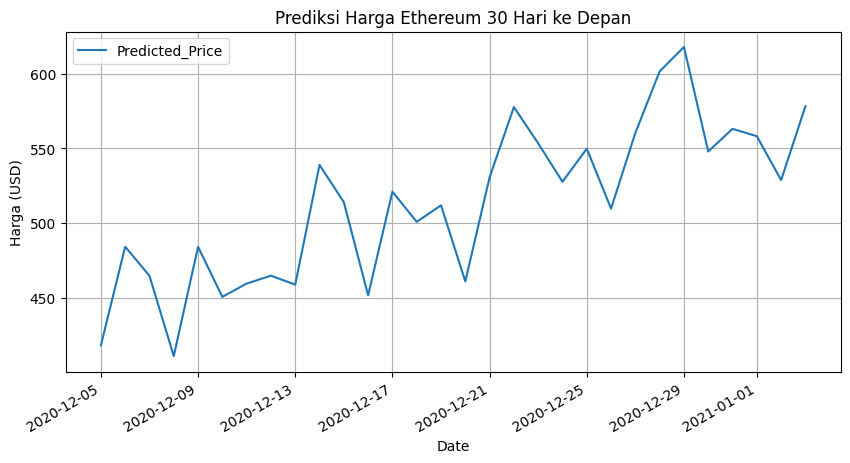

In [53]:
# Gunakan 30 data terakhir untuk prediksi
X_future = X_scaled[-30:]

# Prediksi harga 30 hari ke depan
forecast = knn.predict(X_future)

# Buat tanggal prediksi
forecast_dates = pd.date_range(start=pd.to_datetime(df.index[-1]), periods=31, freq='D')[1:]

# Buat DataFrame hasil prediksi
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Predicted_Price': forecast})
forecast_df.set_index('Date', inplace=True)

# Tampilkan hasil prediksi
print("\nPrediksi Harga Ethereum 30 Hari ke Depan:")
print(forecast_df.head())

# (Opsional) Visualisasi hasil prediksi
forecast_df.plot(figsize=(10, 5), title='Prediksi Harga Ethereum 30 Hari ke Depan')
plt.ylabel("Harga (USD)")
plt.grid(True)
plt.show()


#prediksi dengan sample data 100

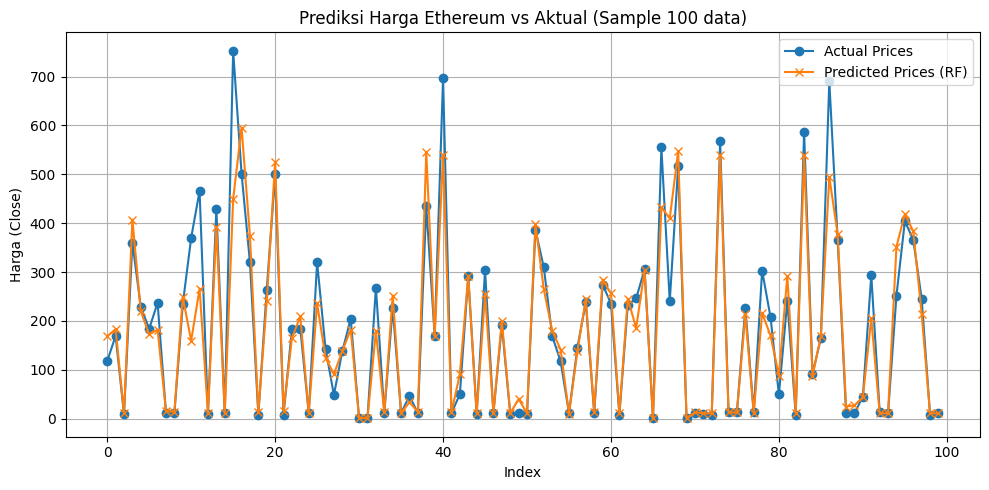

In [54]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:100], label='Actual Prices', marker='o')
plt.plot(y_pred_rf[:100], label='Predicted Prices (RF)', marker='x')
plt.title('Prediksi Harga Ethereum vs Aktual (Sample 100 data)')
plt.xlabel('Index')
plt.ylabel('Harga (Close)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
